In [179]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.learning_curve import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
def pd2np(df):
  return df.as_matrix()

In [181]:
X_train = pd2np(pd.read_csv('./data/nba/X_train.csv'))
y_train = pd2np(pd.read_csv('./data/nba/y_train.csv'))
X_test = pd2np(pd.read_csv('./data/nba/X_test.csv'))

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=1)



In [182]:
from sklearn.linear_model import Perceptron

candidate = [0, 1, 10, 100, 1000, 10000, 50000]

accuracy_train = []
accuracy_valid = []
for a in candidate:
    
    perc = Perceptron(penalty='l2', alpha=a)
    perc.fit(X_train, y_train)
    
    y_train_pred = perc.predict(X_train)
    y_valid_pred = perc.predict(X_valid)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_valid.append(accuracy_score(y_valid, y_valid_pred))
    
print(accuracy_train)
print(accuracy_valid)

/Users/seankang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seankang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.57089887946781537, 0.55012404918345648, 0.55012404918345648, 0.55012404918345648, 0.55012404918345648, 0.55012404918345648, 0.55012404918345648]
[0.57239185750636135, 0.55127226463104329, 0.55127226463104329, 0.55127226463104329, 0.55127226463104329, 0.55127226463104329, 0.55127226463104329]


In [183]:
# RidgeClassifier

candidate = [0, 1, 10, 100, 1000, 10000, 50000]
accuracy_train = []
accuracy_valid = []
for a in candidate:
    
    rg = RidgeClassifier(alpha=a)
    rg.fit(X_train, y_train)
    
    y_train_pred = rg.predict(X_train)
    y_valid_pred = rg.predict(X_valid)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_valid.append(accuracy_score(y_valid, y_valid_pred))

print(accuracy_train)
print(accuracy_valid)

[0.60661413888055837, 0.60658687532375477, 0.60658687532375477, 0.60647782109654025, 0.60721393713023797, 0.61015840126502907, 0.60748657269827422]
[0.60750636132315516, 0.60750636132315516, 0.6075699745547074, 0.60750636132315516, 0.60737913486005091, 0.60998727735368952, 0.61005089058524176]


/Users/seankang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:810: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [184]:
# RandomForest
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                max_depth=3,
                                random_state=1,
                                n_jobs=2)

forest.fit(X_train, y_train)
y_train_pred = rg.predict(X_train)
y_valid_pred = rg.predict(X_valid)

print('Train Accuracy: %.3f' % accuracy_score(y_train, y_train_pred))
print('Valid Accuracy: %.3f' % accuracy_score(y_valid, y_valid_pred))

Train Accuracy: 0.607
Valid Accuracy: 0.610


/Users/seankang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [205]:
def mse(model, X, y):
  return ((model.predict(X) - y)**2).mean()

y = y_train.reshape(y_train.shape[0])
train_sizes, train_scores, test_scores = learning_curve(
      estimator=forest, X=X_train, y=y, train_sizes=[500, 1000, 2000, 5000, 8000], scoring=mse)
    


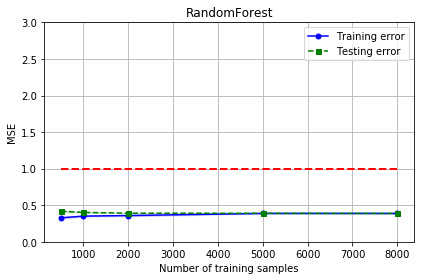

In [206]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
  train_sizes,
  train_mean,
  color='blue',
  marker='o',
  markersize=5,
  label='Training error')
plt.fill_between(
  train_sizes,
  train_mean + train_std,
  train_mean - train_std,
  alpha=0.15,
  color='blue')

plt.plot(
  train_sizes,
  test_mean,
  color='green',
  linestyle='--',
  marker='s',
  markersize=5,
  label='Testing error')
plt.fill_between(
  train_sizes,
  test_mean + test_std,
  test_mean - test_std,
  alpha=0.15,
  color='green')

plt.hlines(y=1, xmin=500, xmax=8000, color='red', linewidth=2, linestyle='--')

plt.title('RandomForest')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.ylim([0, 3])
plt.tight_layout()
#plt.savefig('./output/fig-learning-curve-%d.png' % d, dpi=300)
plt.show()



In [207]:
# Select bset three features

sfm = SelectFromModel(forest, threshold=0.115)
# calls forest.fit()
sfm.fit(X_train, y_train)
Z_forest_alt = sfm.transform(X_train)

forest.fit(Z_forest_alt, y_train)
X_valid = sfm.transform(X_valid)

y_pred = forest.predict(X_valid)

print('Accuracy: %.2f' % accuracy_score(y_valid, y_pred))

X_test = sfm.transform(X_test)
y_pred = forest.predict(X_test)


/Users/seankang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/feature_selection/from_model.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
/Users/seankang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.61


In [214]:
import csv

f = open('y_pred.csv', 'w')
y_pred = y_pred.reshape(y_pred.shape[0],1)
with f:

    writer = csv.writer(f)
    
    writer.writerows(y_pred)

In [213]:
y_pred.shape

(13100,)